# HomeWork 7

**DeadLine : 12:00 PM 19 Aban 1399**

**Total points : 165 pts**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

# PART 5A

Here is for your helper functions(optional)

Implement these functions for converting color spaces.

In [3]:
def convert_to_hsv(image):
    '''
    Converts the color space of the input image to the HSV color space.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''
    
    out_img = image.copy()
    
    #Write your code here
    out_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    return out_img

def convert_to_ycbcr(image):
    '''
    Converts the color space of the input image to the YCbCr color space.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''
    
    out_img = image.copy()
    
    #Write your code here
    out_img = cv2.cvtColor(image, cv2.COLOR_BGR2YCR_CB)          
    
    return out_img

Test your implementation (dont change this cell)

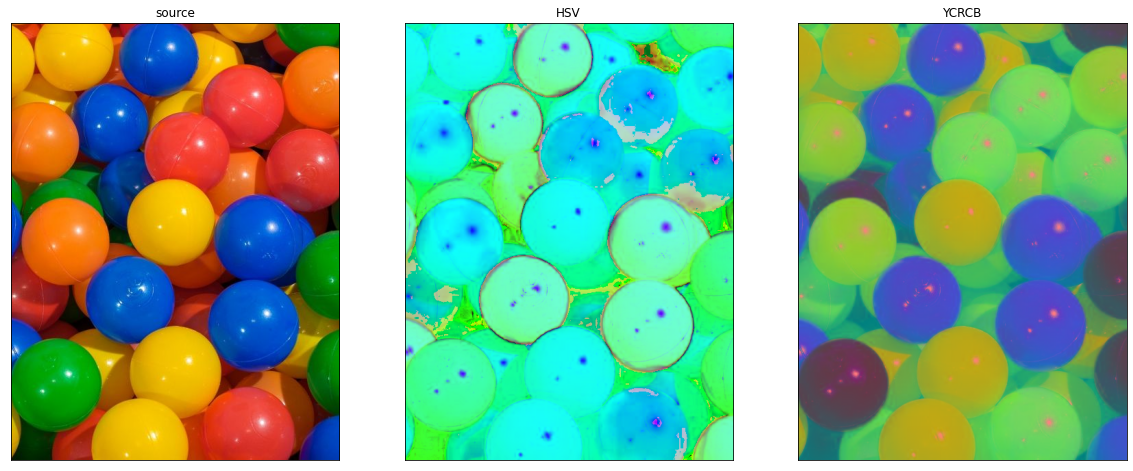

In [4]:
image_list = []

image = cv2.imread(os.path.join('images', '5.jpg'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])

image_list.append([convert_to_hsv(image), 'HSV', 'img'])
image_list.append([convert_to_ycbcr(image), 'YCRCB', 'img'])

plotter(image_list,1 , 3, True, 20, 10, '2A')

# PART 5B

Here is for your helper functions(optional)

Implement this function to get differences between two images.

In [5]:
from PIL import Image
def get_dif(image1, image2):
    '''
    Creates a new image that differences between two input images are shown.
    
    Parameters:
        image1 (numpy.ndarray): The first input image.
        image2 (numpy.ndarray): The second input image.
    
    Returns:
        numpy.ndarray: The result difference image.
    '''
    
    out_img = image1.copy()
    
    #Write your code here
    rgbArray = np.zeros((586, 805, 3), 'uint8')
    rgbArray[..., 0] = image1
    rgbArray[..., 1] = image2
    rgbArray[..., 2] = image2
    out_img = Image.fromarray(rgbArray)
    
    return out_img

Test your implementation (dont change this cell)

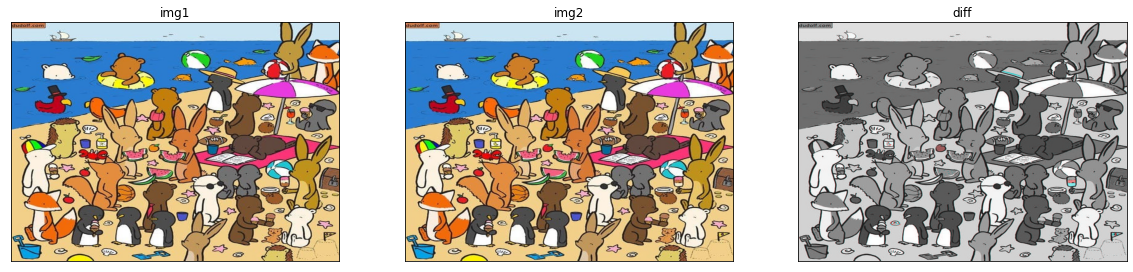

In [6]:
image_list = []

image1 = cv2.imread(os.path.join('images', '5b1.jpg'))
image_list.append([cv2.cvtColor(image1, cv2.COLOR_BGR2RGB), 'img1', 'img'])
image2 = cv2.imread(os.path.join('images', '5b2.jpg'))
image_list.append([cv2.cvtColor(image2, cv2.COLOR_BGR2RGB), 'img2', 'img'])

image1 = cv2.imread(os.path.join('images', '5b1.jpg'), cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(os.path.join('images', '5b2.jpg'), cv2.IMREAD_GRAYSCALE)
image_list.append([get_dif(image1, image2), 'diff', 'img'])

plotter(image_list,1 , 3, True, 20, 10, '2B')

# PART 6

Here is for your helper functions(optional)

Implement this function to process the input frame.

In [7]:
def process_frame(frame):
    '''
    Converts red circles in the input image to white circles.
    
    Parameters:
        frame (numpy.ndarray): The input frame.
    
    Returns:
        numpy.ndarray: The result output frame.
    '''
    
    result = frame.copy()
    
    #Write your code here
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    lower_red = np.array([0,120,70])
    upper_red = np.array([10,255,255])
    mask1 = cv2.inRange(hsv, lower_red, upper_red)
    
    lower_red = np.array([170,120,70])
    upper_red = np.array([180,255,255])
    mask2 = cv2.inRange(hsv, lower_red, upper_red)
    
    mask = mask1 + mask2
    
    mask2 = cv2.bitwise_not(mask)
    result_without_red = cv2.bitwise_and(frame, frame, mask=mask2)
    
    frame[np.where(mask == mask)] = 255
    result_white = cv2.bitwise_and(frame, frame, mask=mask)

    result = result_without_red + result_white
    
    return result

Test your implementation (dont change this cell)

In [8]:
cap = cv2.VideoCapture('balls.mp4')

frame_width = int(cap.get(3)) 
frame_height = int(cap.get(4)) 
   
size = (frame_width, frame_height) 
fps = cap.get(cv2.CAP_PROP_FPS)
out = cv2.VideoWriter('balls_processed.mp4',  
                         cv2.VideoWriter_fourcc(*'DIVX'), 
                         fps, size) 

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        out.write(process_frame(frame))
    else:
        break
out.release()
cap.release()

In [9]:
from IPython.display import HTML

text =  """
<table>
<tr>
    <td>
        <h3>Input</h3>
        <video alt="input" width="400" height="240" autoplay>
            <source src="balls.mp4" type="video/mp4">
        </video>
    </td>
    <td>
      <h3>Processed</h3>
      <video alt="output" width="400" height="240" autoplay>
            <source src="balls_processed.mp4" type="video/mp4">
      </video>
    </td>
</tr>
</table>

"""
HTML(text)

Input,Processed


# PART 7

Here is for your helper functions(optional)

Implement this function for Harris detection.

In [92]:
def harris_points(image):
    '''
    Gets corner points by applying the harris detection algorithm.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''
    
    out_img = image.copy()
    
    #Write your code here
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    Kx = np.array([[-1,0,1],
                   [-2,0,2],
                   [-1,0,1]], dtype=np.float64)
    Ky = np.array([[1,2,1],
                   [0,0,0],
                   [-1,-2,-1]], dtype=np.float64)
    
    Ix = cv2.filter2D(gray, -1, Kx)
    Ix = Ix.astype(np.float64)
    Iy = cv2.filter2D(gray, -1, Ky)
    Iy = Iy.astype(np.float64)
    Ixy = cv2.GaussianBlur(Ix*Iy, (3,3), 1)
    Ixx = cv2.GaussianBlur(Ix**2, (3,3), 1)
    Iyy = cv2.GaussianBlur(Iy**2, (3,3), 1)
    detM = Ixx * Iyy - Ixy ** 2
    traceM = Ixx + Iyy
    R = detM - (0.05 * (traceM ** 2))
    Rcopy = R.astype(np.float64).copy()
    for j in range(2, len(R)-2):
        for i in range(2, len(R)-2):
            kernel = R[i-2:i+3, j-2:j+3]
            if R[i, j] < kernel.max():
                Rcopy[i, j] = 0
                
    for i in range(0,len(R)):
        for j in range(0,len(R)):
            if Rcopy[i,j] > 30000:
                out_img = cv2.circle(out_img, (i,j), 5, (255, 0, 0), -1)
                
    return out_img

dont change this cell!!

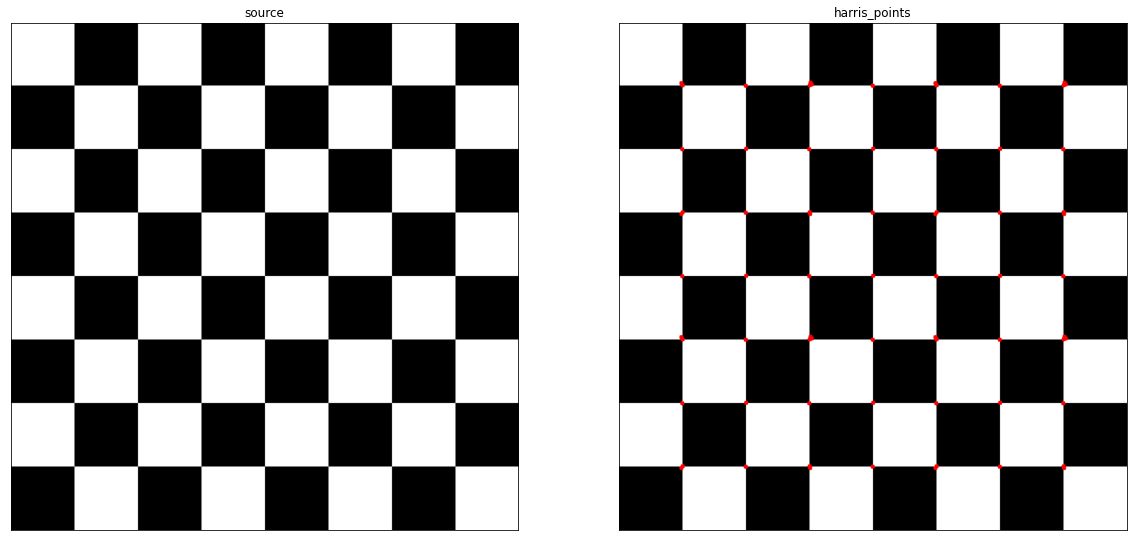

In [93]:
image_list = []

image = cv2.imread(os.path.join('images', '7.jpg'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])

image_list.append([harris_points(image), 'harris_points', 'img'])

plotter(image_list,1 , 2, True, 20, 10, '7')

for create proper files for sending in quera run this cell.

In [1]:
!python notebook_converter.py

# PART 4

In [22]:
import numpy as np
import scipy.linalg as la

M1 = np.array([[84.33,-16.97],
              [-16.97,59.48]])

result1 = la.eig(M1)
print("result1: ",result1[0])

M2 = np.array([[163.54,-0.217],
              [-0.217,0.1053]])

result2 = la.eig(M2)
print("result2: ",result2[0])

M3 = np.array([[0.1714,-0.496],
              [-0.496,164.4]])

result3 = la.eig(M3)
print("result3: ",result3[0])

M4 = np.array([[0.1439,-0.009],
              [-0.009,0.323]])

result4 = la.eig(M4)
print("result4: ",result4[0])

result1:  [92.93739228+0.j 50.87260772+0.j]
result2:  [1.63540288e+02+0.j 1.05011879e-01+0.j]
result3:  [  0.169902+0.j 164.401498+0.j]
result4:  [0.14344888+0.j 0.32345112+0.j]


End!!!